In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from matplotlib.ticker import FuncFormatter
import os
from geopy.geocoders import Nominatim

In [3]:
# create Gantt chart
df = pd.read_csv(r'C:\Users\User\Documents\Changers_Data_analytics\PET_project\war_dates_copy.csv', delimiter=';')
df

,country,start,end
0,Afghanistan,24.12.1974,15.02.1989
1,Bosnia and Herzegovina,06.04.1992,14.12.1995
2,Croatia,31.03.1991,12.11.1995
3,Montenegro,01.10.1991,31.05.1992
4,North Macedonia,22.01.2001,13.08.2001
5,Serbia,31.03.1991,13.08.2001
6,Slovenia,27.06.1991,07.07.1991
7,Iraq,20.03.2003,15.12.2011
8,Lebanon,13.04.1975,13.10.1990
9,Libya,15.02.2011,23.10.2011


In [4]:
# formatting dates to date format
df['start'] = pd.to_datetime(df['start'], format='%d.%m.%Y')
df['end'] = pd.to_datetime(df['end'], format='%d.%m.%Y')
print(df.head())

                  country      start        end
0             Afghanistan 1974-12-24 1989-02-15
1  Bosnia and Herzegovina 1992-04-06 1995-12-14
2                 Croatia 1991-03-31 1995-11-12
3              Montenegro 1991-10-01 1992-05-31
4         North Macedonia 2001-01-22 2001-08-13


In [5]:
# create some additional columns for further visualization
df['days_to_start']=(df['start']-df['start'].min()).dt.days
df['days_to_end']=(df['end']-df['start'].min()).dt.days
df['war_duration_days']=df['days_to_end']-df['days_to_start']+1
df['war_duration_years']=(df['end'].max().year-df['start'].min().year)
df

,country,start,end,days_to_start,days_to_end,war_duration_days,war_duration_years
0,Afghanistan,1974-12-24,1989-02-15,0,5167,5168,49
1,Bosnia and Herzegovina,1992-04-06,1995-12-14,6313,7660,1348,49
2,Croatia,1991-03-31,1995-11-12,5941,7628,1688,49
3,Montenegro,1991-10-01,1992-05-31,6125,6368,244,49
4,North Macedonia,2001-01-22,2001-08-13,9526,9729,204,49
5,Serbia,1991-03-31,2001-08-13,5941,9729,3789,49
6,Slovenia,1991-06-27,1991-07-07,6029,6039,11,49
7,Iraq,2003-03-20,2011-12-15,10313,13505,3193,49
8,Lebanon,1975-04-13,1990-10-13,110,5772,5663,49
9,Libya,2011-02-15,2011-10-23,13202,13452,251,49


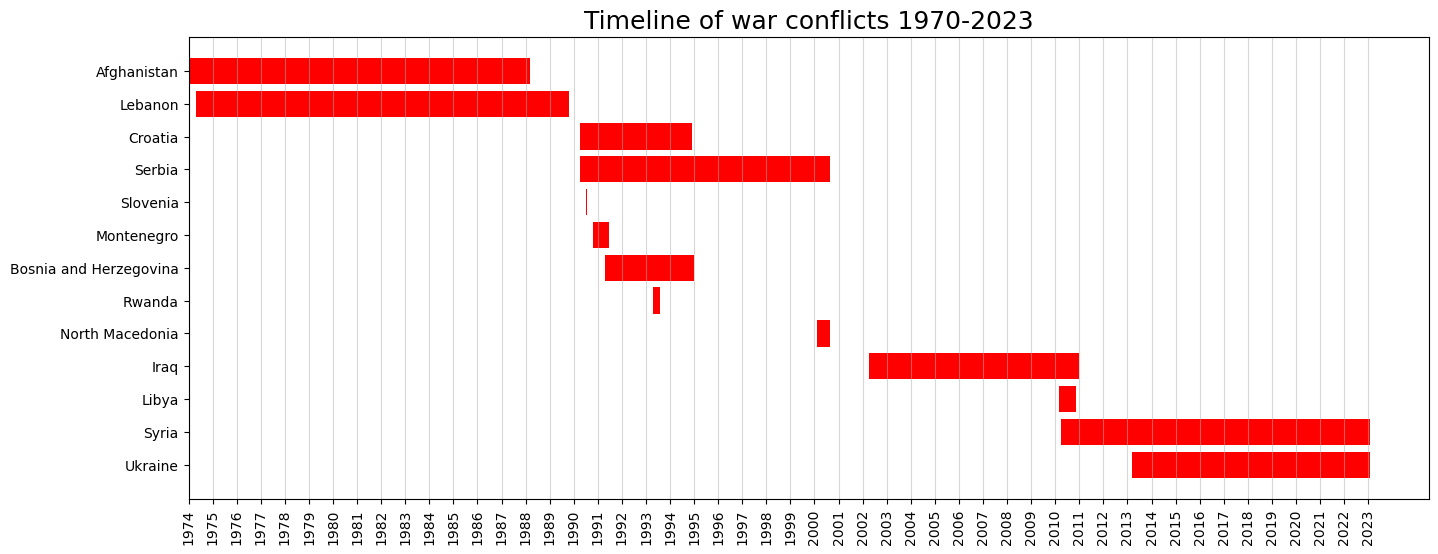

In [6]:
# sort data in chronological order
df=df.sort_values(by='start')
# create Gantt chart
fig, ax = plt.subplots(figsize=(16,6))
plt.barh(y=df['country'], width=df['war_duration_days'], left=df['days_to_start'], color='red')
plt.title('Timeline of war conflicts 1970-2023', fontsize=18)
plt.gca().invert_yaxis()
xticks = np.arange(-1, df['days_to_end'].max() + 1, 365)
xticklabels = pd.date_range(start=df['start'].min() + dt.timedelta(days=4), end=df['end'].max()).strftime("%Y")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::365])
ax.xaxis.grid(True, alpha=0.5)
plt.xticks(rotation=90)
plt.savefig('gantt_chart.png')
plt.show()

In [7]:
# create line chart
df_p=pd.read_csv(r'C:\Users\User\Documents\Changers_Data_analytics\PET_project\population_war_country_1970_2023.csv',
                 delimiter=',')
print(df_p.head())

                     Name GENC  Area in Square Kilometers      1970      1971  \
0             Afghanistan   AF                     652230  12122740  12749385   
1  Bosnia and Herzegovina   BA                      51187   3669000   3761000   
2                 Croatia   HR                      55974   4200551   4215869   
3                    Iraq   IQ                     437367   9105567   9732199   
4                 Lebanon   LB                      10230   2320495   2447943   

       1972      1973      1974      1975      1976  ...      2014      2015  \
0  13079460  13421301  13772076  14132019  14501369  ...  31809829  32547550   
1   3819000   3872000   3925000   3980000   4033000  ...   3870503   3865491   
2   4225310   4234664   4245822   4255000   4286311  ...   4356748   4335285   
3  10061506  10401956  10753925  11117804  11493995  ...  33992998  34813806   
4   2513207   2578960   2645305   2692031   2721832  ...   5878034   6179654   

       2016      2017      2018 

In [8]:
df_population=pd.DataFrame(df_p)
print(df_population.head())

                     Name GENC  Area in Square Kilometers      1970      1971  \
0             Afghanistan   AF                     652230  12122740  12749385   
1  Bosnia and Herzegovina   BA                      51187   3669000   3761000   
2                 Croatia   HR                      55974   4200551   4215869   
3                    Iraq   IQ                     437367   9105567   9732199   
4                 Lebanon   LB                      10230   2320495   2447943   

       1972      1973      1974      1975      1976  ...      2014      2015  \
0  13079460  13421301  13772076  14132019  14501369  ...  31809829  32547550   
1   3819000   3872000   3925000   3980000   4033000  ...   3870503   3865491   
2   4225310   4234664   4245822   4255000   4286311  ...   4356748   4335285   
3  10061506  10401956  10753925  11117804  11493995  ...  33992998  34813806   
4   2513207   2578960   2645305   2692031   2721832  ...   5878034   6179654   

       2016      2017      2018 

In [9]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       13 non-null     object
 1   GENC                       13 non-null     object
 2   Area in Square Kilometers  13 non-null     int64 
 3   1970                       13 non-null     int64 
 4   1971                       13 non-null     int64 
 5   1972                       13 non-null     int64 
 6   1973                       13 non-null     int64 
 7   1974                       13 non-null     int64 
 8   1975                       13 non-null     int64 
 9   1976                       13 non-null     int64 
 10  1977                       13 non-null     int64 
 11  1978                       13 non-null     int64 
 12  1979                       13 non-null     int64 
 13  1980                       13 non-null     int64 
 14  1981        

In [10]:
# exclude some unnecessary columns
columns_to_exclude=['GENC', 'Area in Square Kilometers']
df_population=df_population.drop(columns=columns_to_exclude)
df_population

,Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,12122740,12749385,13079460,13421301,13772076,14132019,14501369,14880372,15269281,...,31809829,32547550,33310667,34097944,34907481,35739709,36594776,37466414,38346720,39232003
1,Bosnia and Herzegovina,3669000,3761000,3819000,3872000,3925000,3980000,4033000,4086000,4135000,...,3870503,3865491,3859923,3853839,3847289,3840279,3832751,3824782,3816459,3807764
2,Croatia,4200551,4215869,4225310,4234664,4245822,4255000,4286311,4318673,4349242,...,4356748,4335285,4313911,4292667,4271543,4250505,4229585,4208973,4188853,4169239
3,Iraq,9105567,9732199,10061506,10401956,10753925,11117804,11493995,11882916,12317137,...,33992998,34813806,35580015,36345459,37164456,37998273,38828885,39650145,40462701,41266109
4,Lebanon,2320495,2447943,2513207,2578960,2645305,2692031,2721832,2757773,2800036,...,5878034,6179654,6232203,6223873,6093900,5841037,5463514,5261372,5296814,5331203
5,Libya,1999162,2077381,2183877,2312369,2450747,2568090,2663767,2718837,2793329,...,6100968,6227706,6351165,6483076,6621675,6757971,6890637,7017224,7137931,7252573
6,Montenegro,510001,519914,527678,534461,542221,549000,554552,560073,565561,...,620897,619723,618126,616284,614229,612064,609786,607414,604966,602445
7,North Macedonia,1574407,1596091,1617701,1639236,1661657,1684000,1706445,1727797,1747113,...,2099581,2105107,2110184,2114687,2118782,2122376,2125463,2128262,2130936,2133410
8,Rwanda,3656796,3880225,3992121,4109838,4226380,4356863,4502352,4657072,4818992,...,11148366,11375693,11603005,11899254,12184782,12458371,12709485,12943132,13173730,13400541
9,Serbia,7190213,7306432,7337520,7368646,7399811,7431015,7462259,7493541,7524862,...,7089319,7052916,7015855,6978391,6940138,6902768,6856660,6796857,6739471,6693375


In [11]:
# transpose data to long format 
transposed_df=df_population.set_index('Name').T.reset_index()
melted_df=transposed_df.melt(id_vars=['index'], var_name='Name', value_name='population')
melted_df.columns=['year', 'Name', 'population']
# change datatype to numeric
melted_df['year']=pd.to_numeric(melted_df['year'])
melted_df['population']=pd.to_numeric(melted_df['population'].str.replace(',', ''))
melted_df

AttributeError: Can only use .str accessor with string values!

In [12]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        702 non-null    int64 
 1   Name        702 non-null    object
 2   population  702 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.6+ KB


In [13]:
# group long data by country
agg_df = melted_df.groupby(['Name', 'year']).sum().reset_index()
agg_df

,Name,year,population
0,Afghanistan,1970,12122740
1,Afghanistan,1971,12749385
2,Afghanistan,1972,13079460
3,Afghanistan,1973,13421301
4,Afghanistan,1974,13772076
...,...,...,...
697,Ukraine,2019,43686413
698,Ukraine,2020,43508029
699,Ukraine,2021,43127334
700,Ukraine,2022,38648861


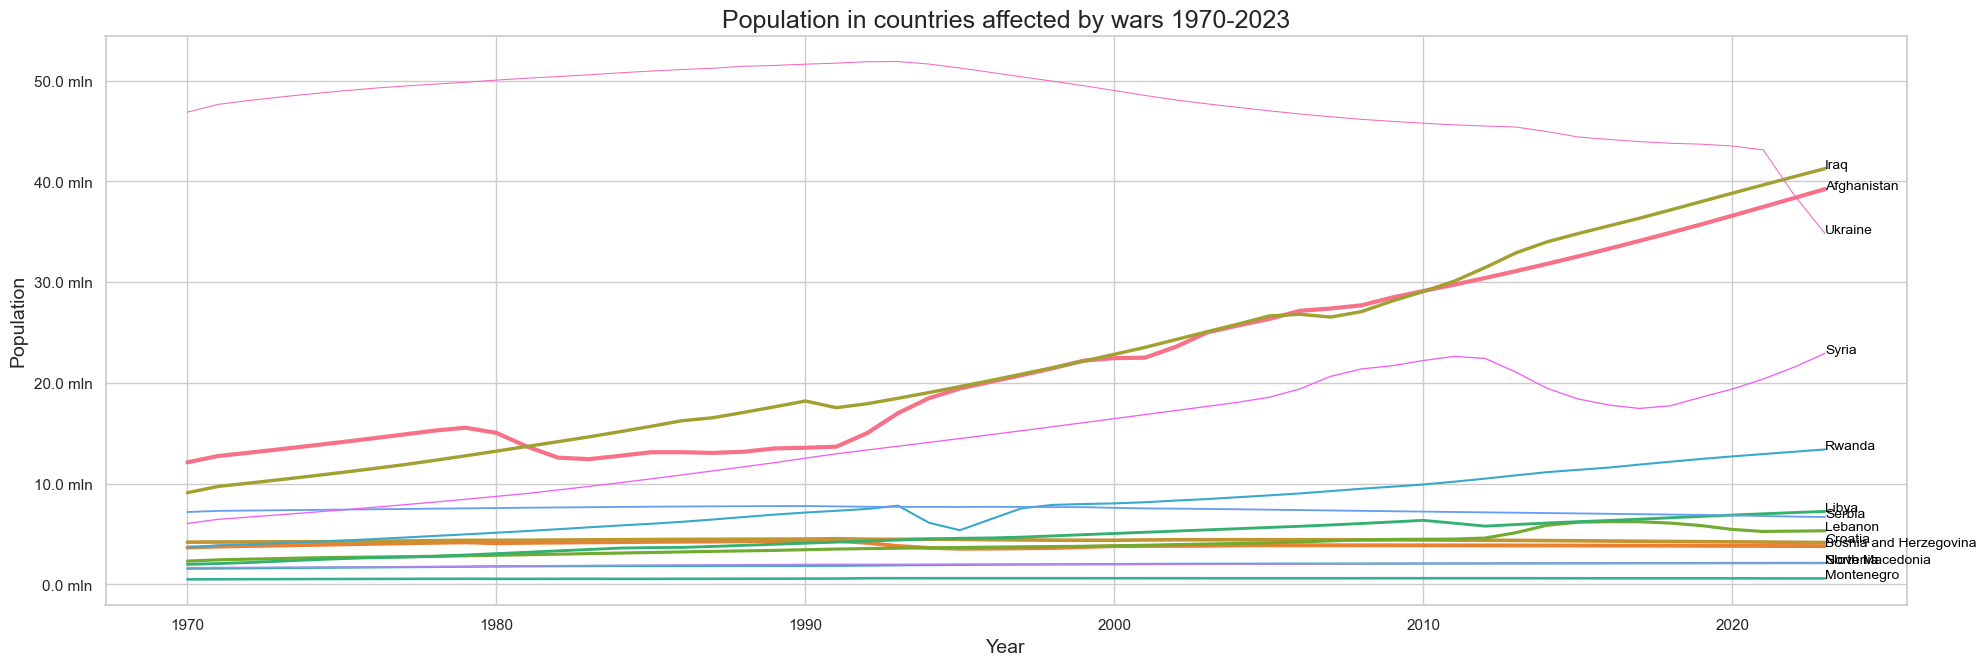

In [16]:
# create line chart
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 8))
sns.lineplot(data=agg_df, x='year', y='population', hue='Name', size='Name')
plt.title('Population in countries affected by wars 1970-2023', fontsize='18')
plt.xlabel('Year', fontsize='14')
plt.ylabel('Population', fontsize='14')
plt.tight_layout(pad=4.6)
def millions_formatter(x, pos):
    return f'{x / 10**6:.1f} mln'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
# annotate lines with country names
for country in agg_df['Name'].unique():
    country_data = agg_df[agg_df['Name'] == country]
    plt.text(country_data['year'].iloc[-1], country_data['population'].iloc[-1], country, 
             horizontalalignment='left', size='small', color='black')
plt.legend().remove()
plt.savefig('line_chart.png')
plt.show()

In [17]:
# create bar charts for migrants data for each country separately
df_migrants=pd.read_csv(r'C:\Users\User\Documents\Changers_Data_analytics\PET_project\migrants_war_country_1975_2023.csv', 
                        delimiter=',')
df_migrants

,Country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452
1,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10220,-9206,-8193,-7180,-6166,-5153,-4139,-3126,-2112,-1099
2,Libya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1689,-7683,-5069,9227,5847,-1324,-4705,-8085,-11465,-14844
3,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2352,-2569,-2787,-3005,-3005,-3005,-3005,-3005,-3005,-3005
4,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1699,2860,2135,1805,1475,1146,816,816,816,816
5,Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-490,507,1051,1597,2144,2691,3237,3237,3237,3237
6,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1506168,-1283015,-583556,-741551,649643,350000,525000,700000,875000,1050000
7,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-600000,-100000,0,0,200000,200000,100000,-11527,-7956309,1300000
8,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2924,-20906,-104863,-23414,-13717,-13474,-20212,-26948,-33686,-40422
9,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,1922.0,-1554.0,268.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_m=pd.DataFrame(df_migrants)
df_m

,Country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452
1,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10220,-9206,-8193,-7180,-6166,-5153,-4139,-3126,-2112,-1099
2,Libya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1689,-7683,-5069,9227,5847,-1324,-4705,-8085,-11465,-14844
3,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2352,-2569,-2787,-3005,-3005,-3005,-3005,-3005,-3005,-3005
4,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1699,2860,2135,1805,1475,1146,816,816,816,816
5,Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-490,507,1051,1597,2144,2691,3237,3237,3237,3237
6,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1506168,-1283015,-583556,-741551,649643,350000,525000,700000,875000,1050000
7,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-600000,-100000,0,0,200000,200000,100000,-11527,-7956309,1300000
8,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2924,-20906,-104863,-23414,-13717,-13474,-20212,-26948,-33686,-40422
9,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,1922.0,-1554.0,268.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# transpose data to long format
df_melted=pd.melt(df_m, id_vars=['Country'], var_name='year', value_name='migrants')
df_melted['year']=pd.to_numeric(df_melted['year'])
df_melted

,Country,year,migrants
0,Bosnia and Herzegovina,1975,NaN
1,Croatia,1975,NaN
2,Libya,1975,NaN
3,Montenegro,1975,NaN
4,North Macedonia,1975,NaN
...,...,...,...
632,Iraq,2023,-40422.0
633,Serbia,2023,0.0
634,Afghanistan,2023,-3754.0
635,Rwanda,2023,-42308.0


In [20]:
# group data by country
grouped_data=df_melted.groupby('Country')
grouped_data

In [23]:
sns.set(style='whitegrid')
output_dir='bar_plots'
os.makedirs('C:\\Users\\User\\Documents\\Changers_Data_analytics\\PET_project\\bar_plots', exist_ok=True)

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Afghanistan_bar_plot.png


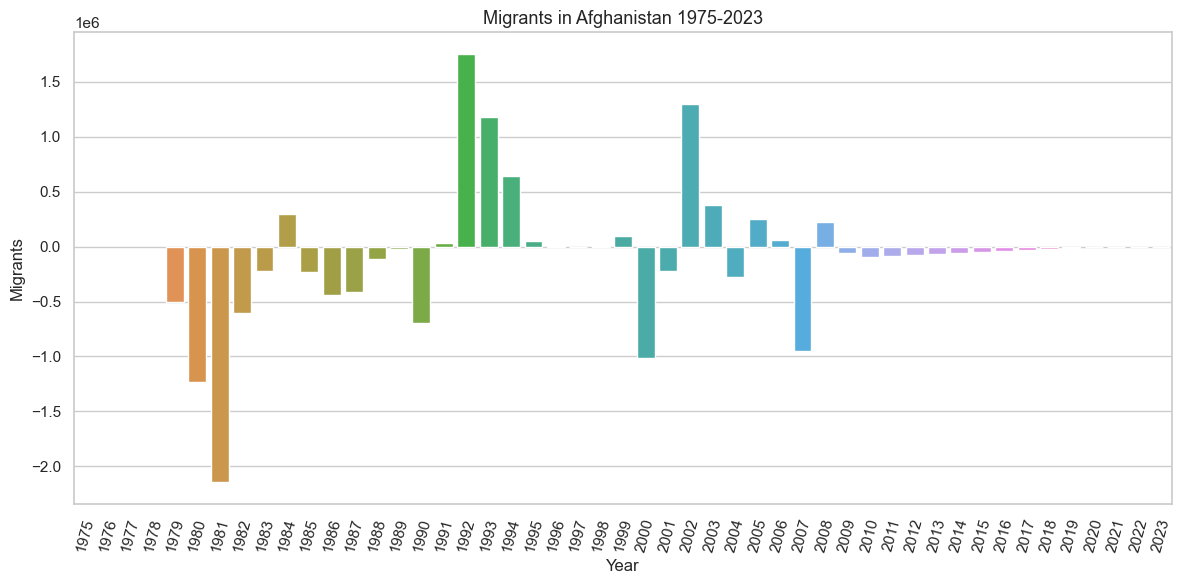

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Bosnia and Herzegovina_bar_plot.png


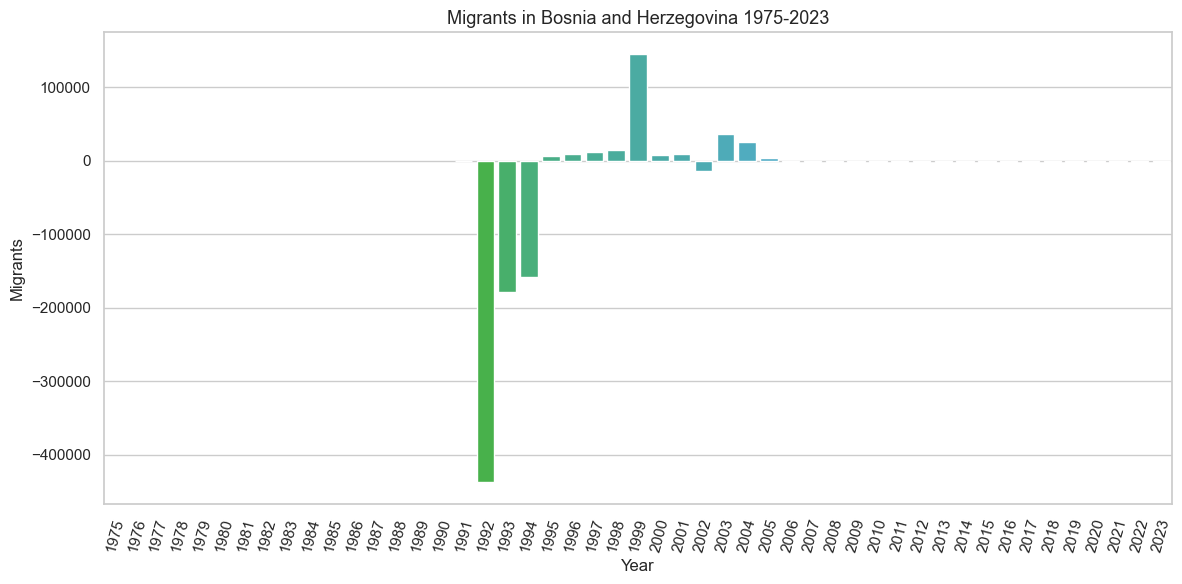

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Croatia_bar_plot.png


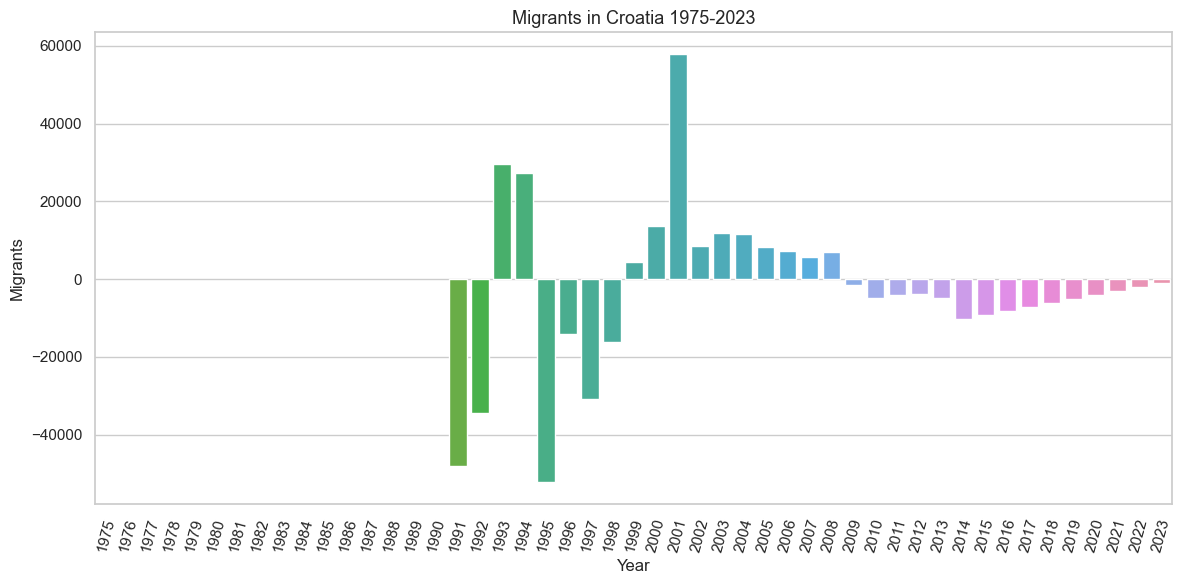

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Iraq_bar_plot.png


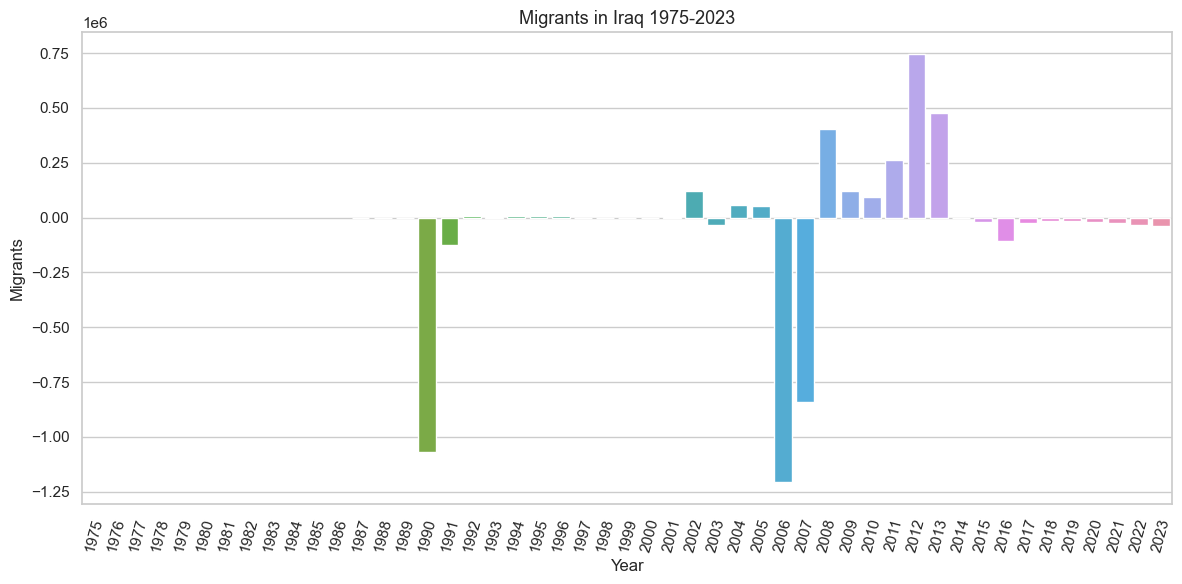

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Lebanon_bar_plot.png


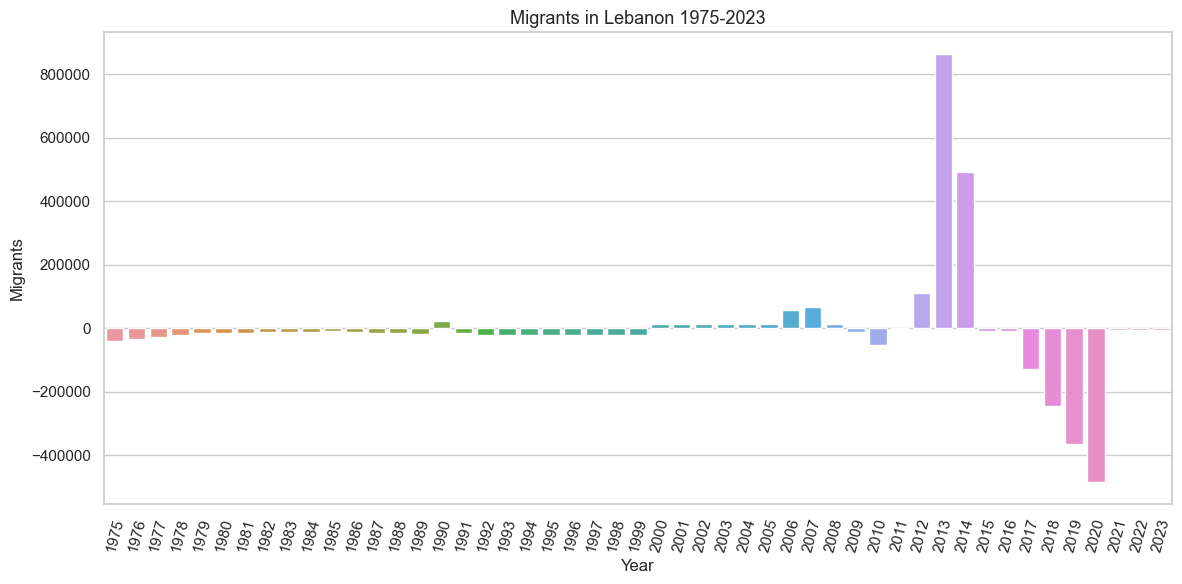

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Libya_bar_plot.png


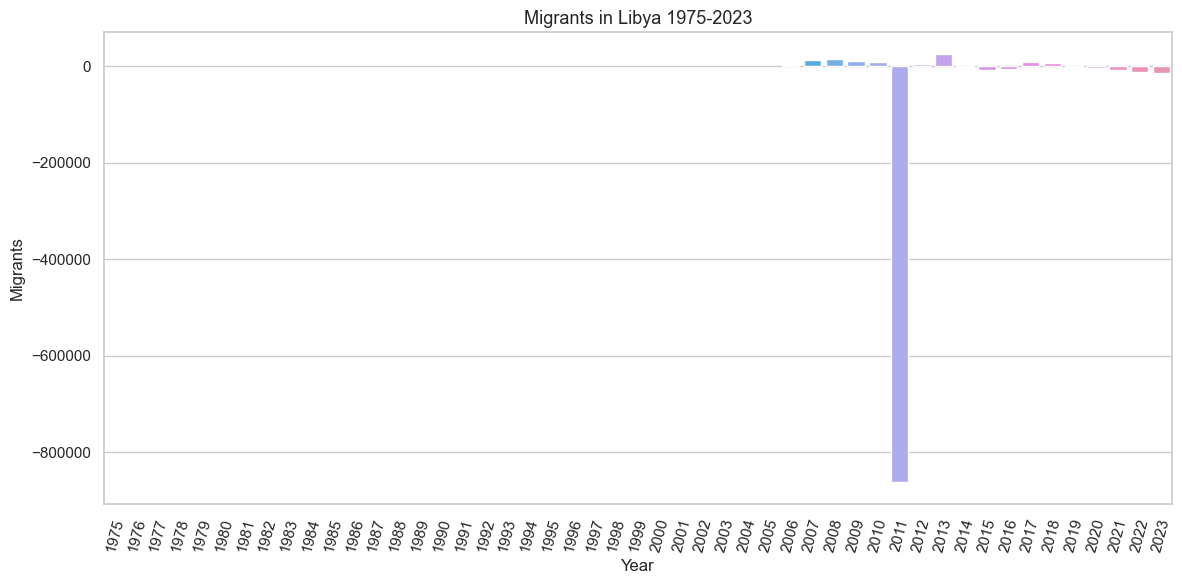

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Montenegro_bar_plot.png


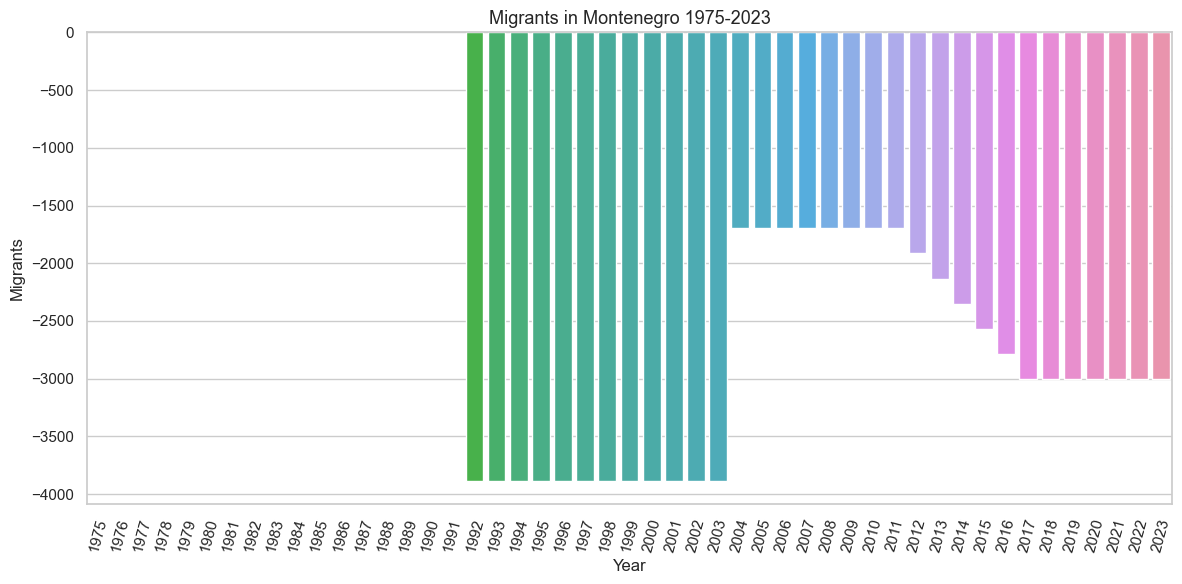

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\North Macedonia_bar_plot.png


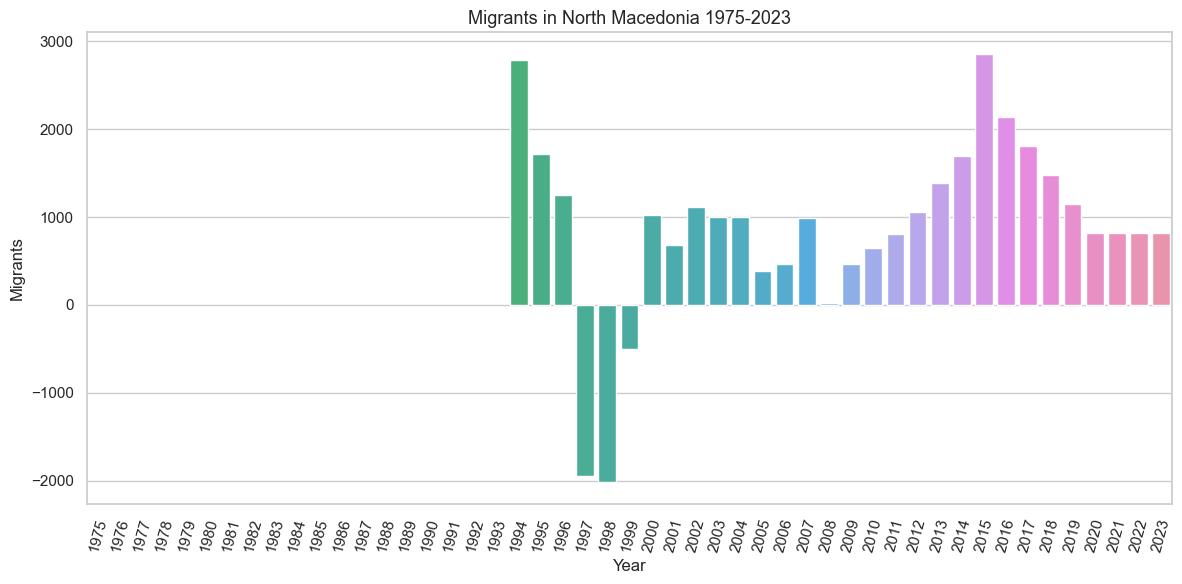

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Rwanda_bar_plot.png


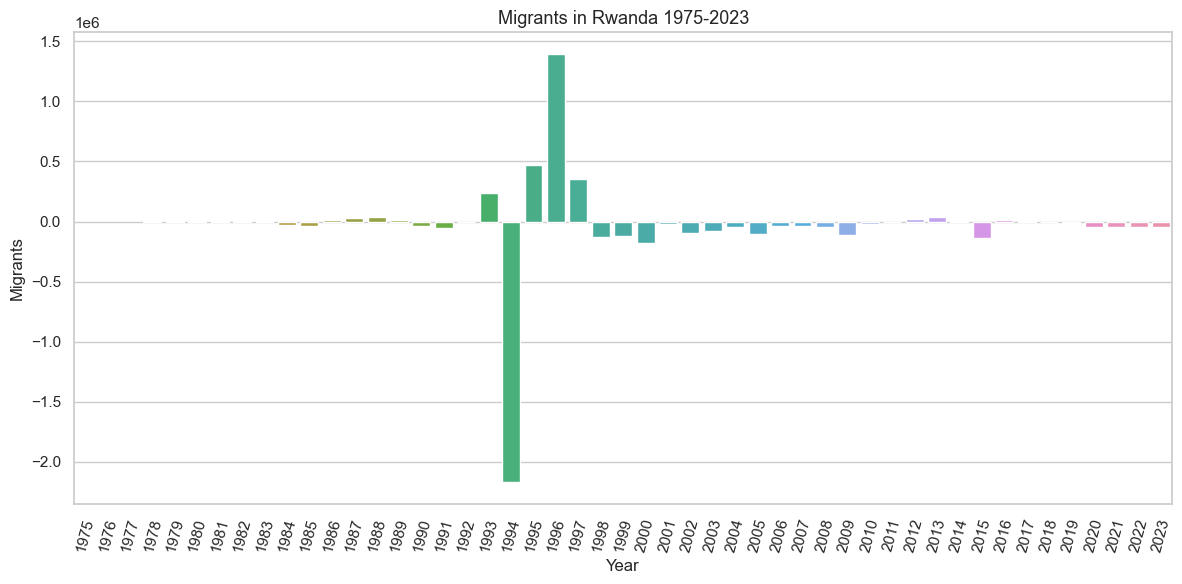

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Serbia_bar_plot.png


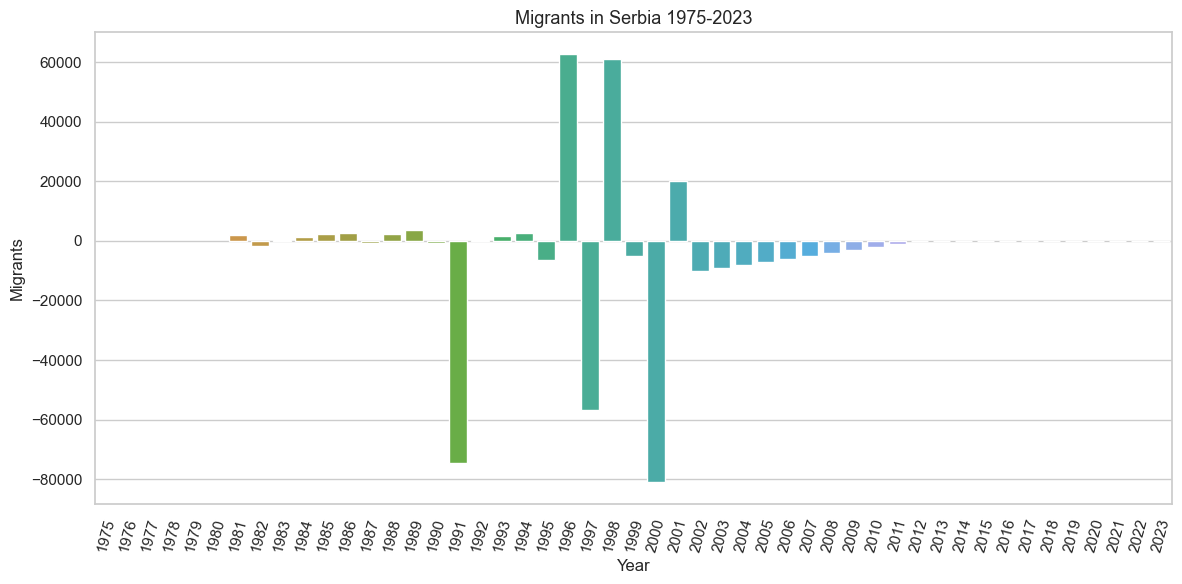

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Slovenia_bar_plot.png


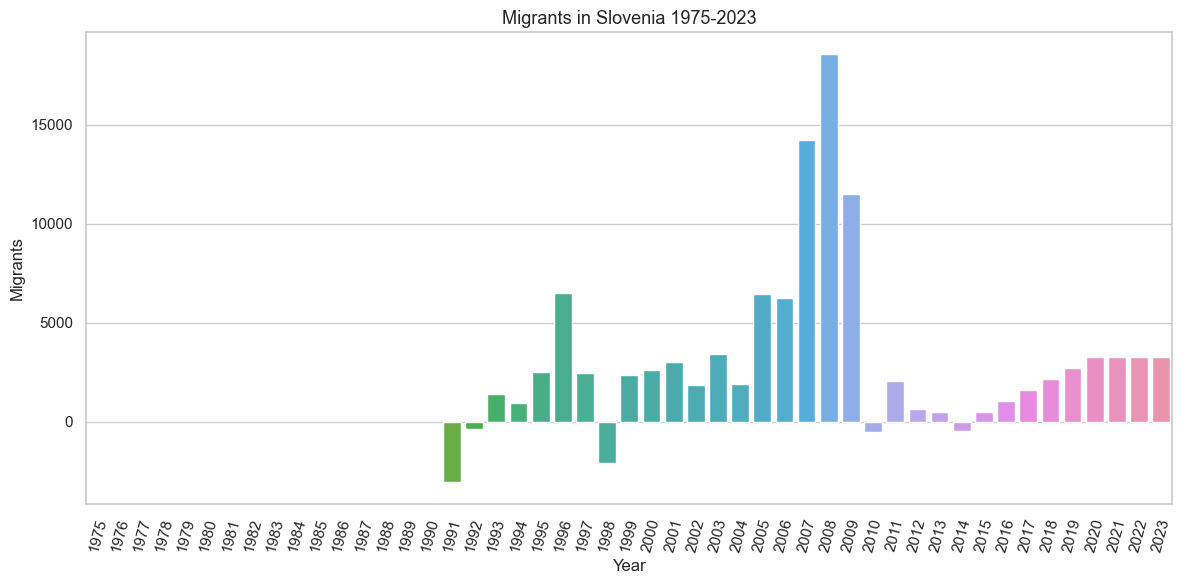

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Syria_bar_plot.png


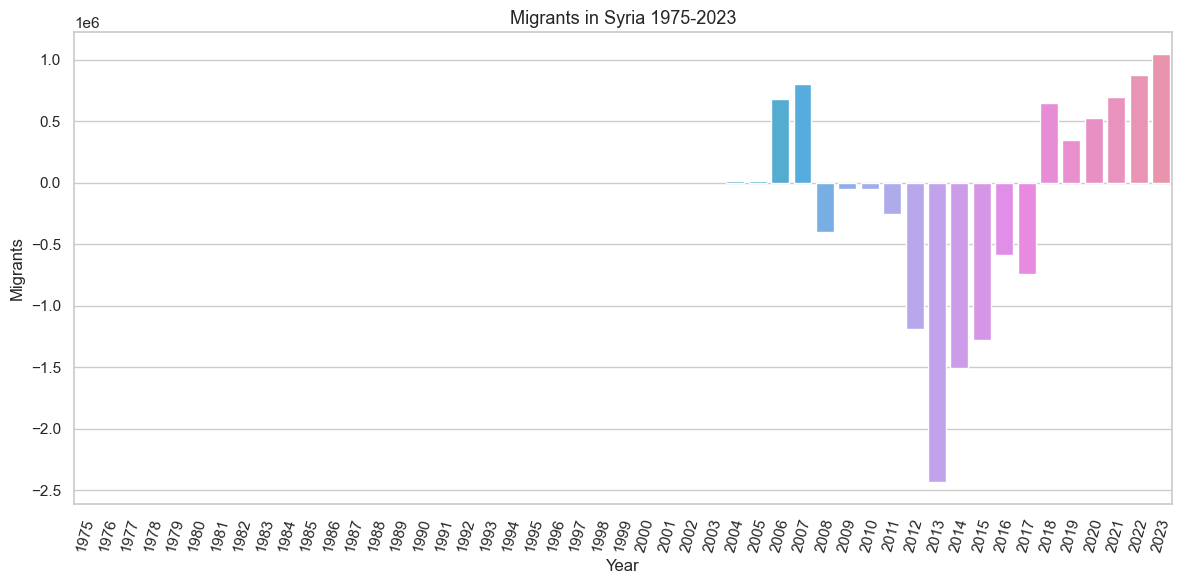

Saving plot to: C:\Users\User\Documents\Changers_Data_analytics\PET_project\bar_plots\Ukraine_bar_plot.png


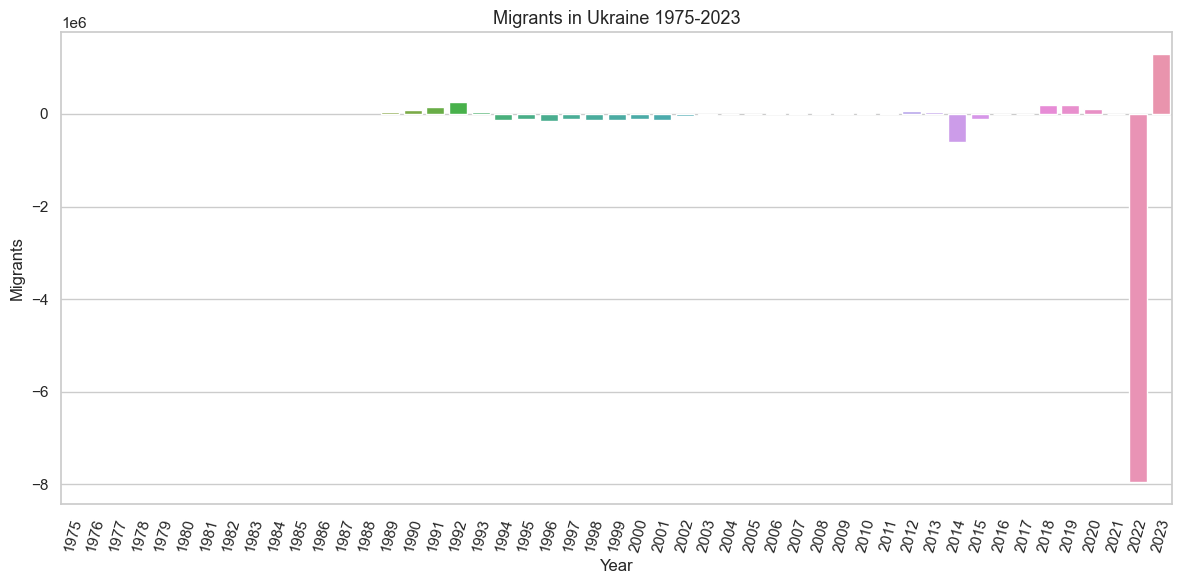

In [25]:
for Country, data in grouped_data:
    plt.figure(figsize=(12,6))
    sns.barplot(x='year', y='migrants', data=data)
    plt.title(f'Migrants in {Country} 1975-2023', fontsize=13)
    plt.xlabel('Year')
    plt.ylabel('Migrants')
    plt.xticks(rotation=75)
    plt.tight_layout()
    output_path = os.path.join('C:\\Users\\User\\Documents\\Changers_Data_analytics\\PET_project\\bar_plots', 
                               f'{Country}_bar_plot.png')
    print("Saving plot to:", output_path)
    plt.savefig(output_path)
    #plt.close()
    plt.show()

In [27]:
# create bar charts to compare relative values
# before starting I will prepare data for calculations in SQL
# let's download 2 datasets and reshape them to the long format for further calculations
migrants=pd.read_csv(
    r'C:\Users\User\Documents\Changers_Data_analytics\PET_project\migrants_war_country_1975_2023.csv',
    delimiter=',')
migrants

,Country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452
1,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10220,-9206,-8193,-7180,-6166,-5153,-4139,-3126,-2112,-1099
2,Libya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1689,-7683,-5069,9227,5847,-1324,-4705,-8085,-11465,-14844
3,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2352,-2569,-2787,-3005,-3005,-3005,-3005,-3005,-3005,-3005
4,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1699,2860,2135,1805,1475,1146,816,816,816,816
5,Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-490,507,1051,1597,2144,2691,3237,3237,3237,3237
6,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1506168,-1283015,-583556,-741551,649643,350000,525000,700000,875000,1050000
7,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-600000,-100000,0,0,200000,200000,100000,-11527,-7956309,1300000
8,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2924,-20906,-104863,-23414,-13717,-13474,-20212,-26948,-33686,-40422
9,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,1922.0,-1554.0,268.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_migrants=pd.DataFrame(migrants)
df_migrants

,Country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452,-1452
1,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10220,-9206,-8193,-7180,-6166,-5153,-4139,-3126,-2112,-1099
2,Libya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1689,-7683,-5069,9227,5847,-1324,-4705,-8085,-11465,-14844
3,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2352,-2569,-2787,-3005,-3005,-3005,-3005,-3005,-3005,-3005
4,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1699,2860,2135,1805,1475,1146,816,816,816,816
5,Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-490,507,1051,1597,2144,2691,3237,3237,3237,3237
6,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1506168,-1283015,-583556,-741551,649643,350000,525000,700000,875000,1050000
7,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-600000,-100000,0,0,200000,200000,100000,-11527,-7956309,1300000
8,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2924,-20906,-104863,-23414,-13717,-13474,-20212,-26948,-33686,-40422
9,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,1922.0,-1554.0,268.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# create new column '1974' with Null values
df_migrants['1974']=None
# reorder columns to place column '1974' between 'Country' column and '1975' column
column_order_migrants=['Country', '1974']+[col for col in df_migrants if col !='Country' and col !='1974']
df_migrants=df_migrants[column_order_migrants]
df_migrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 51 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  13 non-null     object 
 1   1974     0 non-null      object 
 2   1975     1 non-null      float64
 3   1976     1 non-null      float64
 4   1977     1 non-null      float64
 5   1978     2 non-null      float64
 6   1979     3 non-null      float64
 7   1980     3 non-null      float64
 8   1981     4 non-null      float64
 9   1982     4 non-null      float64
 10  1983     4 non-null      float64
 11  1984     4 non-null      float64
 12  1985     4 non-null      float64
 13  1986     4 non-null      float64
 14  1987     5 non-null      float64
 15  1988     5 non-null      float64
 16  1989     6 non-null      float64
 17  1990     6 non-null      float64
 18  1991     9 non-null      float64
 19  1992     10 non-null     float64
 20  1993     10 non-null     float64
 21  1994     11 non-nu

In [30]:
# melt the dataframe to transpose  it to the long format
melted_df_migrants=pd.melt(df_migrants, id_vars=['Country'], var_name=['year'], value_name='migrants')
melted_df_migrants

,Country,year,migrants
0,Bosnia and Herzegovina,1974,None
1,Croatia,1974,None
2,Libya,1974,None
3,Montenegro,1974,None
4,North Macedonia,1974,None
...,...,...,...
645,Iraq,2023,-40422
646,Serbia,2023,0
647,Afghanistan,2023,-3754
648,Rwanda,2023,-42308


In [31]:
# create a row_number column
melted_df_migrants['row_number']=melted_df_migrants.reset_index().index+1
# insert the row_number column before the 'Country' column
melted_df_migrants.insert(0, 'row_number', melted_df_migrants.pop('row_number'))
print(melted_df_migrants)

     row_number                 Country  year migrants
0             1  Bosnia and Herzegovina  1974     None
1             2                 Croatia  1974     None
2             3                   Libya  1974     None
3             4              Montenegro  1974     None
4             5         North Macedonia  1974     None
..          ...                     ...   ...      ...
645         646                    Iraq  2023   -40422
646         647                  Serbia  2023        0
647         648             Afghanistan  2023    -3754
648         649                  Rwanda  2023   -42308
649         650                 Lebanon  2023    -5000

[650 rows x 4 columns]


In [32]:
melted_df_migrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_number  650 non-null    int64 
 1   Country     650 non-null    object
 2   year        650 non-null    object
 3   migrants    454 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.4+ KB


In [33]:
# change data type object to numeric
melted_df_migrants['year']=pd.to_numeric(melted_df_migrants['year'])
melted_df_migrants['migrants']=pd.to_numeric(melted_df_migrants['migrants'].str.replace(',', ''))
melted_df_migrants.info()

AttributeError: Can only use .str accessor with string values!

In [34]:
melted_df_migrants.to_csv('migrants_war_country_1974_2023_melted.csv', index=False)

In [35]:
population=pd.read_csv(
    r'C:\Users\User\Documents\Changers_Data_analytics\PET_project\population_war_country_1970_2023.csv',
    delimiter=',')
population

,Name,GENC,Area in Square Kilometers,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AF,652230,12122740,12749385,13079460,13421301,13772076,14132019,14501369,...,31809829,32547550,33310667,34097944,34907481,35739709,36594776,37466414,38346720,39232003
1,Bosnia and Herzegovina,BA,51187,3669000,3761000,3819000,3872000,3925000,3980000,4033000,...,3870503,3865491,3859923,3853839,3847289,3840279,3832751,3824782,3816459,3807764
2,Croatia,HR,55974,4200551,4215869,4225310,4234664,4245822,4255000,4286311,...,4356748,4335285,4313911,4292667,4271543,4250505,4229585,4208973,4188853,4169239
3,Iraq,IQ,437367,9105567,9732199,10061506,10401956,10753925,11117804,11493995,...,33992998,34813806,35580015,36345459,37164456,37998273,38828885,39650145,40462701,41266109
4,Lebanon,LB,10230,2320495,2447943,2513207,2578960,2645305,2692031,2721832,...,5878034,6179654,6232203,6223873,6093900,5841037,5463514,5261372,5296814,5331203
5,Libya,LY,1759540,1999162,2077381,2183877,2312369,2450747,2568090,2663767,...,6100968,6227706,6351165,6483076,6621675,6757971,6890637,7017224,7137931,7252573
6,Montenegro,ME,13452,510001,519914,527678,534461,542221,549000,554552,...,620897,619723,618126,616284,614229,612064,609786,607414,604966,602445
7,North Macedonia,MK,25433,1574407,1596091,1617701,1639236,1661657,1684000,1706445,...,2099581,2105107,2110184,2114687,2118782,2122376,2125463,2128262,2130936,2133410
8,Rwanda,RW,24668,3656796,3880225,3992121,4109838,4226380,4356863,4502352,...,11148366,11375693,11603005,11899254,12184782,12458371,12709485,12943132,13173730,13400541
9,Serbia,RS,77474,7190213,7306432,7337520,7368646,7399811,7431015,7462259,...,7089319,7052916,7015855,6978391,6940138,6902768,6856660,6796857,6739471,6693375


In [36]:
df_population=pd.DataFrame(population)
df_population

,Name,GENC,Area in Square Kilometers,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AF,652230,12122740,12749385,13079460,13421301,13772076,14132019,14501369,...,31809829,32547550,33310667,34097944,34907481,35739709,36594776,37466414,38346720,39232003
1,Bosnia and Herzegovina,BA,51187,3669000,3761000,3819000,3872000,3925000,3980000,4033000,...,3870503,3865491,3859923,3853839,3847289,3840279,3832751,3824782,3816459,3807764
2,Croatia,HR,55974,4200551,4215869,4225310,4234664,4245822,4255000,4286311,...,4356748,4335285,4313911,4292667,4271543,4250505,4229585,4208973,4188853,4169239
3,Iraq,IQ,437367,9105567,9732199,10061506,10401956,10753925,11117804,11493995,...,33992998,34813806,35580015,36345459,37164456,37998273,38828885,39650145,40462701,41266109
4,Lebanon,LB,10230,2320495,2447943,2513207,2578960,2645305,2692031,2721832,...,5878034,6179654,6232203,6223873,6093900,5841037,5463514,5261372,5296814,5331203
5,Libya,LY,1759540,1999162,2077381,2183877,2312369,2450747,2568090,2663767,...,6100968,6227706,6351165,6483076,6621675,6757971,6890637,7017224,7137931,7252573
6,Montenegro,ME,13452,510001,519914,527678,534461,542221,549000,554552,...,620897,619723,618126,616284,614229,612064,609786,607414,604966,602445
7,North Macedonia,MK,25433,1574407,1596091,1617701,1639236,1661657,1684000,1706445,...,2099581,2105107,2110184,2114687,2118782,2122376,2125463,2128262,2130936,2133410
8,Rwanda,RW,24668,3656796,3880225,3992121,4109838,4226380,4356863,4502352,...,11148366,11375693,11603005,11899254,12184782,12458371,12709485,12943132,13173730,13400541
9,Serbia,RS,77474,7190213,7306432,7337520,7368646,7399811,7431015,7462259,...,7089319,7052916,7015855,6978391,6940138,6902768,6856660,6796857,6739471,6693375


In [37]:
# exclude few columns
columns_to_exclude=['GENC', 'Area in Square Kilometers', '1970', '1971', '1972', '1973']
df_population=df_population.drop(columns=columns_to_exclude)
df_population

,Name,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,13772076,14132019,14501369,14880372,15269281,15555612,15044289,13676225,12582762,...,31809829,32547550,33310667,34097944,34907481,35739709,36594776,37466414,38346720,39232003
1,Bosnia and Herzegovina,3925000,3980000,4033000,4086000,4135000,4181000,4092000,4132963,4158688,...,3870503,3865491,3859923,3853839,3847289,3840279,3832751,3824782,3816459,3807764
2,Croatia,4245822,4255000,4286311,4318673,4349242,4379909,4383000,4390829,4413368,...,4356748,4335285,4313911,4292667,4271543,4250505,4229585,4208973,4188853,4169239
3,Iraq,10753925,11117804,11493995,11882916,12317137,12768376,13232839,13703103,14173318,...,33992998,34813806,35580015,36345459,37164456,37998273,38828885,39650145,40462701,41266109
4,Lebanon,2645305,2692031,2721832,2757773,2800036,2848715,2901188,2954746,3009269,...,5878034,6179654,6232203,6223873,6093900,5841037,5463514,5261372,5296814,5331203
5,Libya,2450747,2568090,2663767,2718837,2793329,2924513,3060429,3197888,3336396,...,6100968,6227706,6351165,6483076,6621675,6757971,6890637,7017224,7137931,7252573
6,Montenegro,542221,549000,554552,560073,565561,571018,560000,560090,562548,...,620897,619723,618126,616284,614229,612064,609786,607414,604966,602445
7,North Macedonia,1661657,1684000,1706445,1727797,1747113,1768203,1792000,1808103,1823791,...,2099581,2105107,2110184,2114687,2118782,2122376,2125463,2128262,2130936,2133410
8,Rwanda,4226380,4356863,4502352,4657072,4818992,4975045,5137743,5307835,5486568,...,11148366,11375693,11603005,11899254,12184782,12458371,12709485,12943132,13173730,13400541
9,Serbia,7399811,7431015,7462259,7493541,7524862,7556223,7587622,7619061,7645035,...,7089319,7052916,7015855,6978391,6940138,6902768,6856660,6796857,6739471,6693375


In [38]:
# melt the dataframe to transpose  it to the long format
melted_df_population=pd.melt(df_population, id_vars=['Name'], var_name=['year'], value_name='population')
melted_df_population

,Name,year,population
0,Afghanistan,1974,13772076
1,Bosnia and Herzegovina,1974,3925000
2,Croatia,1974,4245822
3,Iraq,1974,10753925
4,Lebanon,1974,2645305
...,...,...,...
645,Rwanda,2023,13400541
646,Serbia,2023,6693375
647,Slovenia,2023,2099790
648,Syria,2023,22933531


In [39]:
# create a row_number column
melted_df_population['row_number']=melted_df_population.reset_index().index+1
# insert the row_number column before the 'Country' column
melted_df_population.insert(0, 'row_number', melted_df_population.pop('row_number'))
print(melted_df_population)

     row_number                    Name  year  population
0             1             Afghanistan  1974    13772076
1             2  Bosnia and Herzegovina  1974     3925000
2             3                 Croatia  1974     4245822
3             4                    Iraq  1974    10753925
4             5                 Lebanon  1974     2645305
..          ...                     ...   ...         ...
645         646                  Rwanda  2023    13400541
646         647                  Serbia  2023     6693375
647         648                Slovenia  2023     2099790
648         649                   Syria  2023    22933531
649         650                 Ukraine  2023    34831102

[650 rows x 4 columns]


In [40]:
melted_df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_number  650 non-null    int64 
 1   Name        650 non-null    object
 2   year        650 non-null    object
 3   population  650 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.4+ KB


In [41]:
# change data type object to numeric
melted_df_population['year']=pd.to_numeric(melted_df_population['year'])
melted_df_population['population']=pd.to_numeric(melted_df_population['population'].str.replace(',', ''))
melted_df_population.info()

AttributeError: Can only use .str accessor with string values!

In [42]:
melted_df_population.to_csv('population_war_country_1974_2023_melted.csv', index=False)

In [43]:
# upload table with total losses of migrants during war years after some calculations in BigQuery with SQL 
total_loss=pd.read_csv(r'C:\Users\User\Documents\Changers_Data_analytics\PET_project\total_migrants_losses_war_years.csv',
                      delimiter=',')
total_loss

,Name,total_migrants,previous_war_population,total_loss_ratio
0,Afghanistan,-5643989.0,13772076,-40.98
1,Rwanda,-2170400.0,7823959,-27.74
2,Bosnia and Herzegovina,-767200.0,4328421,-17.72
3,Syria,-3847902.0,22223250,-17.31
4,Ukraine,-6867836.0,45388613,-15.13
5,Libya,-862832.0,6367346,-13.55
6,Lebanon,-239950.0,2645305,-9.07
7,Iraq,-1095883.0,24309560,-4.51
8,Croatia,-77880.0,4508347,-1.73
9,Serbia,-75174.0,7786398,-0.97


In [44]:
# upload table with first year losses of migrants during war years
first_year_loss=pd.read_csv(r'C:\Users\User\Documents\Changers_Data_analytics\PET_project\first_year_migrants_losses_war_years.csv',
                      delimiter=',')
first_year_loss

,row_number,Name,current_year,current_population,previous_year_population,migrants,first_year_ratio
0,269,Rwanda,1994,6128862,7823959,-2170400.0,-27.74
1,637,Ukraine,2022,38648861,43127334,-7956309.0,-18.45
2,92,Afghanistan,1981,13676225,15044289,-2145063.0,-14.26
3,487,Libya,2011,6082221,6367346,-862832.0,-13.55
4,236,Bosnia and Herzegovina,1992,4129132,4328421,-437400.0,-10.11
5,506,Syria,2012,22432681,22633830,-1188778.0,-5.25
6,18,Lebanon,1975,2692031,2645305,-40000.0,-1.51
7,224,Croatia,1991,4540641,4508347,-48004.0,-1.06
8,231,Serbia,1991,7751782,7786398,-74654.0,-0.96
9,241,Montenegro,1992,621621,590872,-3889.0,-0.66


In [45]:
# transform both table to dataframes
df_total=pd.DataFrame(total_loss)
df_first=pd.DataFrame(first_year_loss)

In [46]:
# exclude few columns
columns_to_exclude=['row_number', 'current_year', 'current_population', 'previous_year_population', 'migrants']
df_first=df_first.drop(columns=columns_to_exclude)
df_first

,Name,first_year_ratio
0,Rwanda,-27.74
1,Ukraine,-18.45
2,Afghanistan,-14.26
3,Libya,-13.55
4,Bosnia and Herzegovina,-10.11
5,Syria,-5.25
6,Lebanon,-1.51
7,Croatia,-1.06
8,Serbia,-0.96
9,Montenegro,-0.66


In [47]:
columns_to_exclude=['total_migrants', 'previous_war_population']
df_total=df_total.drop(columns=columns_to_exclude)
df_total

,Name,total_loss_ratio
0,Afghanistan,-40.98
1,Rwanda,-27.74
2,Bosnia and Herzegovina,-17.72
3,Syria,-17.31
4,Ukraine,-15.13
5,Libya,-13.55
6,Lebanon,-9.07
7,Iraq,-4.51
8,Croatia,-1.73
9,Serbia,-0.97


In [48]:
# merge two dataframes
table = pd.merge(df_first, df_total, on = 'Name', how = 'inner')
table

,Name,first_year_ratio,total_loss_ratio
0,Rwanda,-27.74,-27.74
1,Ukraine,-18.45,-15.13
2,Afghanistan,-14.26,-40.98
3,Libya,-13.55,-13.55
4,Bosnia and Herzegovina,-10.11,-17.72
5,Syria,-5.25,-17.31
6,Lebanon,-1.51,-9.07
7,Croatia,-1.06,-1.73
8,Serbia,-0.96,-0.97
9,Montenegro,-0.66,-0.67


In [49]:
# transpose dataframe into long format
df_melted_ratio=pd.melt(table, id_vars=['Name'], value_vars=['first_year_ratio', 'total_loss_ratio'], 
                       var_name='ratio_type', value_name='ratio')
df_melted_ratio

,Name,ratio_type,ratio
0,Rwanda,first_year_ratio,-27.74
1,Ukraine,first_year_ratio,-18.45
2,Afghanistan,first_year_ratio,-14.26
3,Libya,first_year_ratio,-13.55
4,Bosnia and Herzegovina,first_year_ratio,-10.11
5,Syria,first_year_ratio,-5.25
6,Lebanon,first_year_ratio,-1.51
7,Croatia,first_year_ratio,-1.06
8,Serbia,first_year_ratio,-0.96
9,Montenegro,first_year_ratio,-0.66


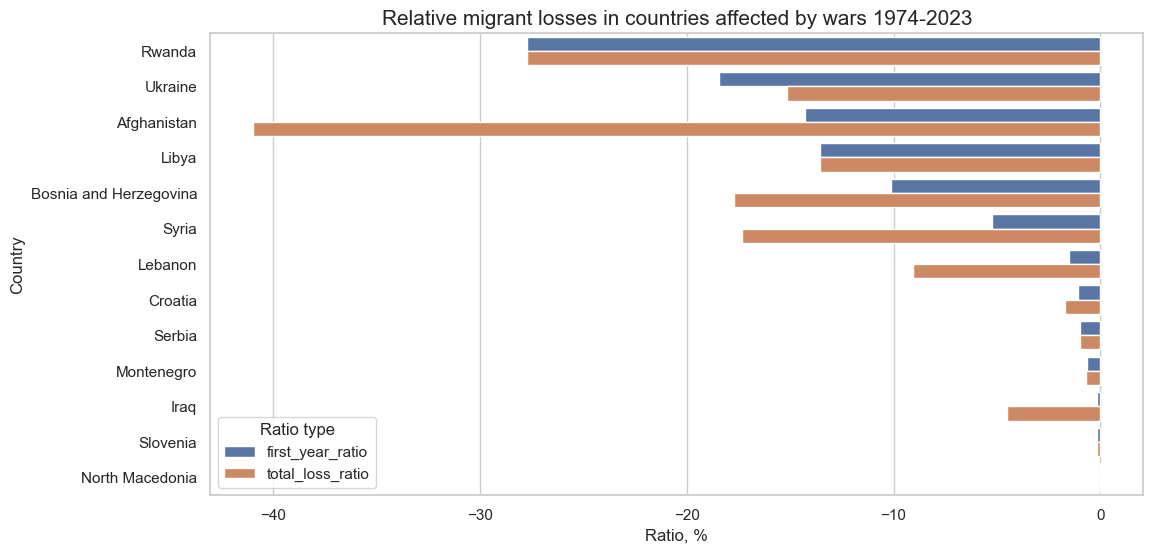

In [50]:
# create bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_melted_ratio, x='ratio', y='Name', hue='ratio_type', orient='h')
plt.legend(title='Ratio type', loc='lower left')
plt.xlabel('Ratio, %')
plt.ylabel('Country')
plt.title('Relative migrant losses in countries affected by wars 1974-2023', fontsize=15)
plt.tight_layout(pad=2.0)
plt.savefig('bar_chart_ratio.png')
plt.show()

In [3]:
# prepare data for creating dashboard in Tableau
world_population=pd.read_csv(r'C:\Users\User\Documents\Changers_Data_analytics\PET_project\world_population_1950_2023.csv',
                            delimiter=',')
world_population

,Rank,country,Capital,Continent,Area__km_,_1950,_1955,_1960,_1965,_1970,...,_1980,_1985,_1990,_1995,_2000,_2005,_2010,_2015,_2020,_2023
0,36,Afghanistan,Kabul,Asia,652230,7480461,7971931,8622466,9565147,10752971,...,12486631,10512221,10694796,16418912,19542982,24411191,28189672,33753499,38972230,42239854
1,140,Armenia,Yerevan,Asia,29743,1385041,1604376,1904148,2234051,2534377,...,3135123,3300896,3556539,3322782,3168523,3047246,2946293,2878595,2805608,2777970
2,91,Azerbaijan,Baku,Asia,86600,3158966,3550017,4131484,4837811,5425317,...,6383060,6891140,7427836,7889330,8190337,8656237,9237202,9863480,10284951,10412651
3,154,Bahrain,Manama,Asia,765,117149,134865,160691,193012,222555,...,362595,434375,517418,612934,711442,901921,1213645,1362142,1477469,1485509
4,8,Bangladesh,Dhaka,Asia,147570,39728535,44315548,50396429,58500159,67541860,...,83929765,95959099,107147651,117793338,129193327,140912590,148391139,157830000,167420951,172954319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,109,Paraguay,Asunción,South America,406752,1504810,1685747,1894829,2143153,2408787,...,3078912,3535498,4059195,4603917,5123819,5476878,5768613,6177950,6618695,6861524
212,44,Peru,Lima,South America,1285216,7678967,8825897,10172207,11781581,13562371,...,17492406,19746610,22109099,24449055,26654439,28147267,29229572,30711863,33304756,34352719
213,170,Suriname,Paramaribo,South America,163820,195765,227145,268396,321069,379918,...,375112,387171,412756,434490,478998,516220,546080,575475,607065,623236
214,133,Uruguay,Montevideo,South America,181034,2234144,2366209,2529021,2680427,2790265,...,2953750,3024218,3117012,3208300,3292224,3317665,3352651,3402818,3429086,3423108


In [4]:
world_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       216 non-null    int64 
 1   country    216 non-null    object
 2   Capital    216 non-null    object
 3   Continent  216 non-null    object
 4   Area__km_  216 non-null    int64 
 5   _1950      216 non-null    int64 
 6   _1955      216 non-null    int64 
 7   _1960      216 non-null    int64 
 8   _1965      216 non-null    int64 
 9   _1970      216 non-null    int64 
 10  _1975      216 non-null    int64 
 11  _1980      216 non-null    int64 
 12  _1985      216 non-null    int64 
 13  _1990      216 non-null    int64 
 14  _1995      216 non-null    int64 
 15  _2000      216 non-null    int64 
 16  _2005      216 non-null    int64 
 17  _2010      216 non-null    int64 
 18  _2015      216 non-null    int64 
 19  _2020      216 non-null    int64 
 20  _2023      216 non-null    int64

In [5]:
df_world=pd.DataFrame(world_population)
df_world

,Rank,country,Capital,Continent,Area__km_,_1950,_1955,_1960,_1965,_1970,...,_1980,_1985,_1990,_1995,_2000,_2005,_2010,_2015,_2020,_2023
0,36,Afghanistan,Kabul,Asia,652230,7480461,7971931,8622466,9565147,10752971,...,12486631,10512221,10694796,16418912,19542982,24411191,28189672,33753499,38972230,42239854
1,140,Armenia,Yerevan,Asia,29743,1385041,1604376,1904148,2234051,2534377,...,3135123,3300896,3556539,3322782,3168523,3047246,2946293,2878595,2805608,2777970
2,91,Azerbaijan,Baku,Asia,86600,3158966,3550017,4131484,4837811,5425317,...,6383060,6891140,7427836,7889330,8190337,8656237,9237202,9863480,10284951,10412651
3,154,Bahrain,Manama,Asia,765,117149,134865,160691,193012,222555,...,362595,434375,517418,612934,711442,901921,1213645,1362142,1477469,1485509
4,8,Bangladesh,Dhaka,Asia,147570,39728535,44315548,50396429,58500159,67541860,...,83929765,95959099,107147651,117793338,129193327,140912590,148391139,157830000,167420951,172954319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,109,Paraguay,Asunción,South America,406752,1504810,1685747,1894829,2143153,2408787,...,3078912,3535498,4059195,4603917,5123819,5476878,5768613,6177950,6618695,6861524
212,44,Peru,Lima,South America,1285216,7678967,8825897,10172207,11781581,13562371,...,17492406,19746610,22109099,24449055,26654439,28147267,29229572,30711863,33304756,34352719
213,170,Suriname,Paramaribo,South America,163820,195765,227145,268396,321069,379918,...,375112,387171,412756,434490,478998,516220,546080,575475,607065,623236
214,133,Uruguay,Montevideo,South America,181034,2234144,2366209,2529021,2680427,2790265,...,2953750,3024218,3117012,3208300,3292224,3317665,3352651,3402818,3429086,3423108


In [6]:
# initialize Nominatim geocoder
geolocator=Nominatim(user_agent="my_geocoder")

In [13]:
# function to get latitude and longitude for a capital
def get_lat_lon(Capital):
    location=geolocator.geocode(Capital)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None
# apply the function to get latitude and longitude for each capital
df_world['latitude'], df_world['longitude']=zip(*df_world['Capital'].apply(get_lat_lon))
# display the DataFrame with latitude and longitude
print(df_world)

     Rank      country     Capital      Continent  Area__km_     _1950  \
0      36  Afghanistan       Kabul           Asia     652230   7480461   
1     140      Armenia     Yerevan           Asia      29743   1385041   
2      91   Azerbaijan        Baku           Asia      86600   3158966   
3     154      Bahrain      Manama           Asia        765    117149   
4       8   Bangladesh       Dhaka           Asia     147570  39728535   
..    ...          ...         ...            ...        ...       ...   
211   109     Paraguay    Asunción  South America     406752   1504810   
212    44         Peru        Lima  South America    1285216   7678967   
213   170     Suriname  Paramaribo  South America     163820    195765   
214   133      Uruguay  Montevideo  South America     181034   2234144   
215    51    Venezuela     Caracas  South America     916445   5488614   

        _1955     _1960     _1965     _1970  ...      _1990      _1995  \
0     7971931   8622466   9565147  10

In [19]:
# reshape data into a long format suitable for creating a line chart in Tableau
# select columns relevant for reshaping
columns_to_keep=['Rank', 'country', 'Capital', 'Continent', 'Area__km_', 'latitude', 'longitude']
# melt dataframe to convert it to long format
melted_df=pd.melt(df_world, id_vars=columns_to_keep, var_name='year', value_name='population')
print(melted_df)

      Rank      country     Capital      Continent  Area__km_   latitude  \
0       36  Afghanistan       Kabul           Asia     652230  34.526011   
1      140      Armenia     Yerevan           Asia      29743  40.177711   
2       91   Azerbaijan        Baku           Asia      86600  40.375588   
3      154      Bahrain      Manama           Asia        765  26.223504   
4        8   Bangladesh       Dhaka           Asia     147570  23.764402   
...    ...          ...         ...            ...        ...        ...   
3451   109     Paraguay    Asunción  South America     406752 -25.280046   
3452    44         Peru        Lima  South America    1285216 -12.062107   
3453   170     Suriname  Paramaribo  South America     163820   5.824176   
3454   133      Uruguay  Montevideo  South America     181034 -34.905892   
3455    51    Venezuela     Caracas  South America     916445  10.506093   

      longitude   year  population  
0     69.177684  _1950     7480461  
1     44.5126

In [20]:
melted_df.to_csv('world_population_1950_1923_latitude_longitude_melted.csv', index=False)